In [106]:
import pandas as pd
import datetime
from datetime import timedelta
import glob
%matplotlib inline

In [101]:
#data = pd.read_csv('../belgicko/ELIA_LOAD_2009.csv', sep=';', skiprows=0, header=1)
data = pd.read_csv('../belgicko/elia_load_2005.csv', sep=';', skiprows=0, header=1)

In [102]:
data.head(1)

,dd,mm,yyyy,0:15,0:30,0:45,1:00,1:15,1:30,1:45,...,23:00,23:15,23:30,23:45,24:00,"2:15""","2:30""","2:45""","3:00""",Unnamed: 103
0,1,1,2005,"9503607,000","9357379,000","9181671,000","9067683,000","9007000,000","8802320,000","8785999,000",...,"9272292,000","9426801,000","9275737,000","9210591,000","8978047,000","0,000","0,000","0,000","0,000",NaN


In [103]:
data.head(1).keys()[3:-5]

Index([u'0:15           ', u'0:30           ', u'0:45           ',
       u'1:00           ', u'1:15           ', u'1:30           ',
       u'1:45           ', u'2:00           ', u'2:15           ',
       u'2:30           ', u'2:45           ', u'3:00           ',
       u'3:15           ', u'3:30           ', u'3:45           ',
       u'4:00           ', u'4:15           ', u'4:30           ',
       u'4:45           ', u'5:00           ', u'5:15           ',
       u'5:30           ', u'5:45           ', u'6:00           ',
       u'6:15           ', u'6:30           ', u'6:45           ',
       u'7:00           ', u'7:15           ', u'7:30           ',
       u'7:45           ', u'8:00           ', u'8:15           ',
       u'8:30           ', u'8:45           ', u'9:00           ',
       u'9:15           ', u'9:30           ', u'9:45           ',
       u'10:00          ', u'10:15          ', u'10:30          ',
       u'10:45          ', u'11:00          ', u'11:15        

In [104]:
def process_key(row, key):
    hours, mins = [int(part.strip('"')) for part in key.split(':')]
    if hours == 24:
        return datetime.datetime(row.yyyy, row.mm, row.dd, 0, mins) + timedelta(days=1)
    else:
        return datetime.datetime(row.yyyy, row.mm, row.dd, hours, mins)

df = pd.DataFrame(columns=['date', 'value'])
prev_value = 0
for row_index, row in data.iterrows():
    for key in row.keys()[3:-5]:
        date = process_key(row, key)
        try:
            value = float(row[key].replace(',','.'))
            prev_value = value
        except ValueError:
            value = prev_value #aby mi nevznikali diery, tak nespravne sparsovane hodnoty nahradim predchadajucou hodnotou        
        new_row = pd.Series([date, value], index=['date', 'value'])
        df = df.append(new_row, ignore_index=True)
df.index = df.date
df.head()

,date,value
date,,
2005-01-01 00:15:00,2005-01-01 00:15:00,9503607
2005-01-01 00:30:00,2005-01-01 00:30:00,9357379
2005-01-01 00:45:00,2005-01-01 00:45:00,9181671
2005-01-01 01:00:00,2005-01-01 01:00:00,9067683
2005-01-01 01:15:00,2005-01-01 01:15:00,9007000


In [108]:
def process_key(row, key):
    hours, mins = [int(part.strip('"')) for part in key.split(':')]
    if hours == 24:
        return datetime.datetime(row.yyyy, row.mm, row.dd, 0, mins) + timedelta(days=1)
    else:
        return datetime.datetime(row.yyyy, row.mm, row.dd, hours, mins)

df = pd.DataFrame(columns=['date', 'value'])

for file_name in glob.glob("./belgicko/*.csv"):
    data = pd.read_csv(file_name, sep=';', skiprows=0, header=1)
    prev_value = 0
    for row_index, row in data.iterrows():
        for key in row.keys()[3:-5]:
            date = process_key(row, key)
            try:
                value = float(row[key].replace(',','.'))
                prev_value = value
            except ValueError:
                value = prev_value #aby mi nevznikali diery, tak nespravne sparsovane hodnoty nahradim predchadajucou hodnotou        
            new_row = pd.Series([date, value], index=['date', 'value'])
            df = df.append(new_row, ignore_index=True)
df.index = df.date
df.head()

,date,value
date,,
2005-01-01 00:15:00,2005-01-01 00:15:00,9503607
2005-01-01 00:30:00,2005-01-01 00:30:00,9357379
2005-01-01 00:45:00,2005-01-01 00:45:00,9181671
2005-01-01 01:00:00,2005-01-01 01:00:00,9067683
2005-01-01 01:15:00,2005-01-01 01:15:00,9007000


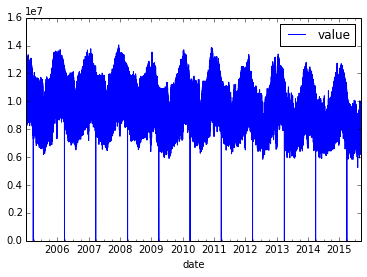

In [109]:
df.plot()

In [111]:
df = df.drop('date', 1)

In [112]:
df.to_csv('./belgicko.csv')